In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Pearson.csv")
df

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


In [53]:
df.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


In [54]:
df.tail()

,Father,Son
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3
1077,70.3,67.0


In [55]:
df.shape

(1078, 2)

In [56]:
df.dtypes

Father    float64
Son       float64
dtype: object

In [57]:
df.isna().sum()

Father    0
Son       0
dtype: int64

In [58]:
x=df.iloc[:,:-1]
x

,Father
0,65.0
1,63.3
2,65.0
3,65.8
4,61.1
...,...
1073,67.0
1074,71.3
1075,71.8
1076,70.7


In [59]:
y=df.iloc[:,-1]
y

0       59.8
1       63.2
2       63.3
3       62.8
4       64.3
        ... 
1073    70.8
1074    68.3
1075    69.3
1076    69.3
1077    67.0
Name: Son, Length: 1078, dtype: float64

Text(0.5, 1.0, 'scatter plot')

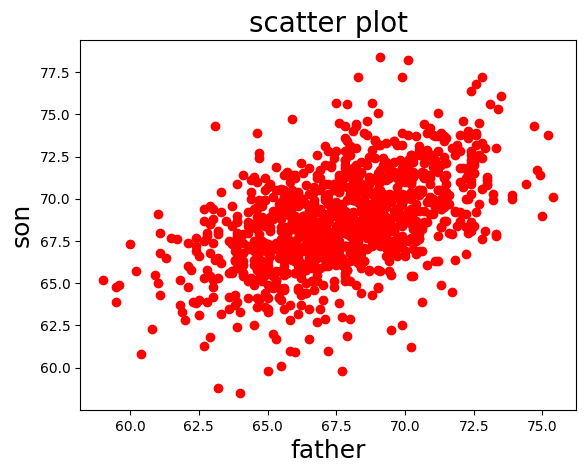

In [60]:
plt.scatter(x,y,color="r")
plt.xlabel("father",fontsize=18)
plt.ylabel("son",fontsize=18)
plt.title("scatter plot",fontsize=20)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

,Father
382,69.1
578,68.7
778,71.3
669,63.3
349,64.4
...,...
847,72.7
715,70.2
905,65.5
235,67.8


In [62]:
x_test

,Father
435,62.3
340,68.6
546,67.2
90,67.6
472,64.1
...,...
12,63.7
250,68.3
282,69.4
268,65.7


In [63]:
y_train

382     71.2
578     69.7
778     69.4
669     66.2
349     70.0
        ... 
847     74.5
715     67.7
905     67.2
235     65.4
1061    73.8
Name: Son, Length: 754, dtype: float64

In [64]:
y_test

435    63.9
340    69.2
546    69.1
90     68.2
472    66.8
       ... 
12     65.7
250    66.2
282    67.1
268    67.0
699    67.2
Name: Son, Length: 324, dtype: float64

In [65]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([65.92267997, 69.1782239 , 68.45476969, 68.66147089, 66.85283538,
       67.93801669, 71.91701482, 68.29974379, 67.62796488, 70.62513231,
       67.16288718, 70.41843111, 69.02319799, 67.52461428, 67.05953658,
       70.83183351, 68.04136729, 71.09021001, 70.056704  , 68.60979559,
       68.09304259, 67.21456248, 68.19639319, 69.07487329, 72.48544312,
       71.24523591, 69.539951  , 65.76765407, 68.97152269, 69.5916263 ,
       68.97152269, 70.0050287 , 68.97152269, 70.1083793 , 69.4366004 ,
       67.62796488, 70.52178171, 66.23273177, 67.73131548, 65.30257636,
       70.88350881, 67.67964018, 68.55812029, 67.16288718, 68.50644499,
       69.6949769 , 70.056704  , 67.67964018, 69.2815745 , 65.66430347,
       69.3332498 , 69.8500028 , 71.65863832, 70.47010641, 69.3332498 ,
       67.88634138, 68.04136729, 70.67680761, 70.2117299 , 67.47293898,
       65.71597877, 66.85283538, 68.76482149, 71.03853471, 71.09021001,
       68.76482149, 67.47293898, 68.24806849, 69.7983275 , 67.93

In [66]:
# print(model.predict([[57.5,65.8]]))

Text(0.5, 1.0, 'scatter plot')

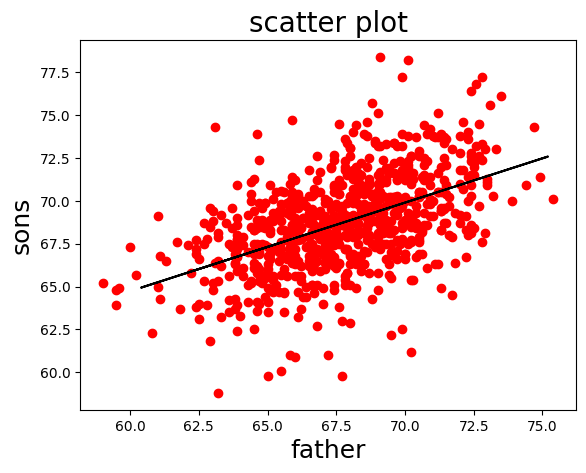

In [ ]:
plt.scatter(x_train,y_train,color="r")
plt.plot(x_test,y_pred,color="k")
plt.xlabel("father",fontsize=18)
plt.ylabel("sons",fontsize=18)
plt.title("scatter plot",fontsize=20)

In [69]:
print("slope is",model.coef_)

slope is [0.516753]


In [70]:
print("constant is",model.intercept_)

constant is 33.72896778928395


In [73]:
df1=pd.DataFrame({"actualvalue":y_test,"predicted value":y_pred,"difference":y_test-y_pred})
df1

,actualvalue,predicted value,difference
435,63.9,65.922680,-2.022680
340,69.2,69.178224,0.021776
546,69.1,68.454770,0.645230
90,68.2,68.661471,-0.461471
472,66.8,66.852835,-0.052835
...,...,...,...
12,65.7,66.646134,-0.946134
250,66.2,69.023198,-2.823198
282,67.1,69.591626,-2.491626
268,67.0,67.679640,-0.679640


In [74]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test,y_pred)
MAE

1.8604116267799427

In [75]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.02725255601019402

In [76]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
MSE

5.767494510777141

In [77]:
from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE

2.401560848859995

In [78]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.24458872247423524